In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Key columns that could be helpful for identifying patterns related to loan defaults:
1.	acc_now_delinq: The number of accounts on which the borrower is currently delinquent.
2.	acc_open_past_24mths: Number of trades (accounts) opened in the past 24 months.
3.	addr_state: The state of residence of the borrower, which could provide insights into geographic risk patterns.
4.	annual_inc: The self-reported annual income, an essential factor in assessing the borrower's repayment ability.
5.	loan_amnt: The total loan amount.
6.	loan_status: The status of the loan (e.g., Fully Paid, Charged Off). This is crucial for identifying defaulters.
7.	dti: Debt-to-income ratio, a key indicator of financial health.
8.	grade: Loan grade assigned by the company, often tied to creditworthiness.
9.	emp_length: Employment length, which might indicate job stability and repayment potential.
10.	purpose: The purpose of the loan, which can show patterns of risky loan categories.
11.	term: The term of the loan in months (e.g., 36 months or 60 months).
12.	int_rate: Interest rate on the loan, which might increase for riskier applicants.
13.	home_ownership: The homeownership status of the applicant, an indicator of financial security.
14.	installment: Monthly payment on the loan, which could show the burden relative to income.
These columns are particularly relevant to assess borrower risk and identify patterns related to loan defaults. Hence created a subset of dataframe with these columns


In [33]:
# List of required columns
required_columns = ['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'loan_amnt',
                    'loan_status', 'dti', 'grade', 'emp_length', 'purpose', 'term','int_rate','home_ownership','installment']

# Read CSV file with only the required columns
loanDataFrame = pd.read_csv('loan.csv', usecols=required_columns)

# Display the first few rows of the dataframe
print(loanDataFrame.head())


   loan_amnt        term int_rate  installment grade emp_length  \
0       5000   36 months   10.65%       162.87     B  10+ years   
1       2500   60 months   15.27%        59.83     C   < 1 year   
2       2400   36 months   15.96%        84.33     C  10+ years   
3      10000   36 months   13.49%       339.31     C  10+ years   
4       3000   60 months   12.69%        67.79     B     1 year   

  home_ownership  annual_inc  loan_status         purpose addr_state    dti  \
0           RENT     24000.0   Fully Paid     credit_card         AZ  27.65   
1           RENT     30000.0  Charged Off             car         GA   1.00   
2           RENT     12252.0   Fully Paid  small_business         IL   8.72   
3           RENT     49200.0   Fully Paid           other         CA  20.00   
4           RENT     80000.0      Current           other         OR  17.94   

   acc_now_delinq  acc_open_past_24mths  
0               0                   NaN  
1               0                   Na

In [9]:
loanDataFrame.shape

(39717, 14)

In [35]:
# based on the past history, very high risk applicants who shall default 
loanDataFrame[loanDataFrame['loan_status'] == 'Charged Off'].shape[0]

5627

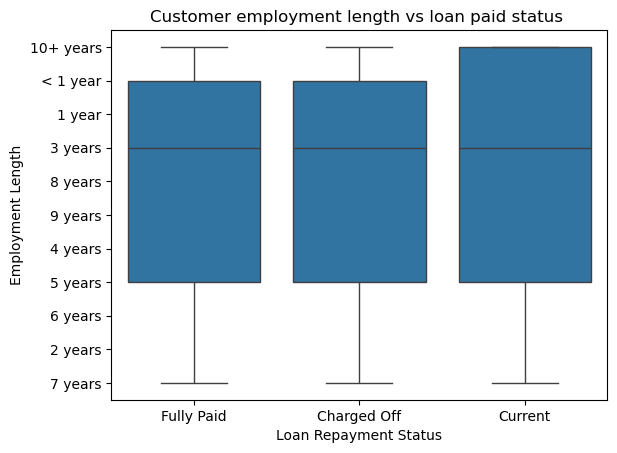

In [369]:
# Employment length Vs Loan repayment status
# emp_length: Employment length reflects job stability. Shorter employment histories may increase the risk of default.
#From following we can conclude employment length not relevant to loan default

sns.boxplot(y='emp_length', x='loan_status', data=loanDataFrame)
plt.title('Customer employment length vs loan paid status ')
plt.ylabel('Employment Length')
plt.xlabel('Loan Repayment Status')
plt.show()

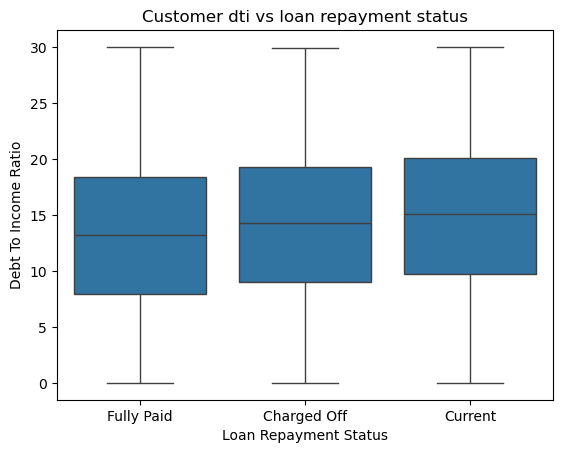

In [49]:
# DTI Vs Loan repayment status
# dti (Debt-to-Income Ratio): A higher DTI ratio indicates that the borrower is more financially burdened and therefore a higher risk. 
# Loans could be rejected if the DTI exceeds a specific threshold, say 40%.
#From following we can conclude DTI not relevant to loan default as current data shows all customers has dti less than 40%

sns.boxplot(y='dti', x='loan_status', data=loanDataFrame)
plt.title('Customer dti vs loan repayment status')
plt.ylabel('Debt To Income Ratio')
plt.xlabel('Loan Repayment Status')
plt.show()

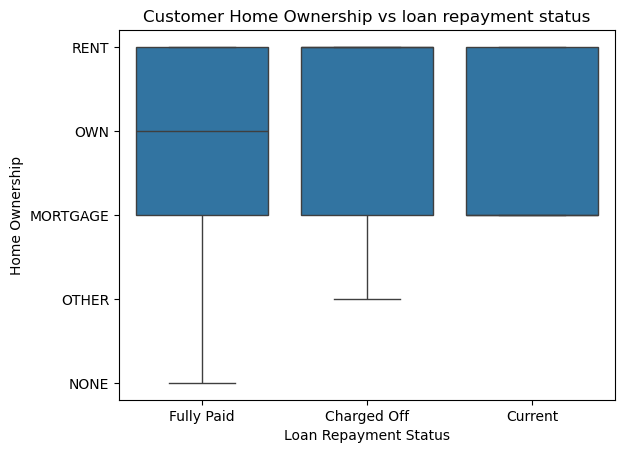

In [53]:
# Home Ownership Vs Loan repayment status
# home_ownership: Borrowers with homeownership may be more financially stable and could be favored.
# From following we can conclude Home Ownership not relevant to loan default

sns.boxplot(y='home_ownership', x='loan_status', data=loanDataFrame)
plt.title('Customer Home Ownership vs loan repayment status')
plt.ylabel('Home Ownership')
plt.xlabel('Loan Repayment Status')
plt.show()

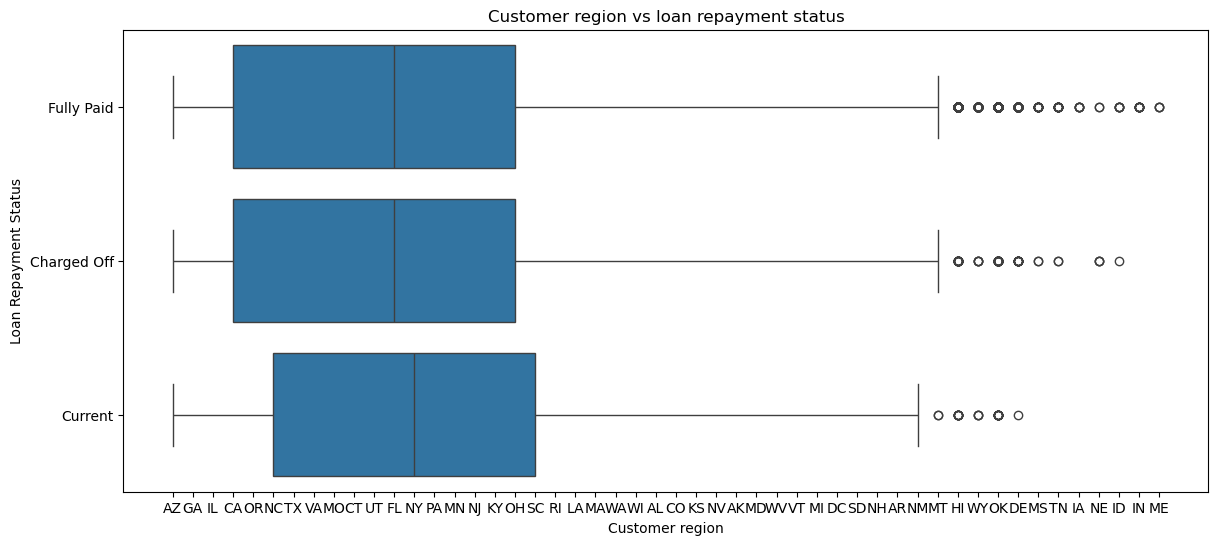

In [57]:
# Region Vs Loan repayment status
# addr_state: The state of residence of the borrower, which could provide insights into geographic risk patterns.
# From following we can conclude customer Region not relevant to loan default

plt.figure(figsize=(14, 6)) 
sns.boxplot(x='addr_state', y='loan_status', data=loanDataFrame, orient='h')
plt.title('Customer region vs loan repayment status')
plt.xlabel('Customer region')
plt.ylabel('Loan Repayment Status')
plt.show()

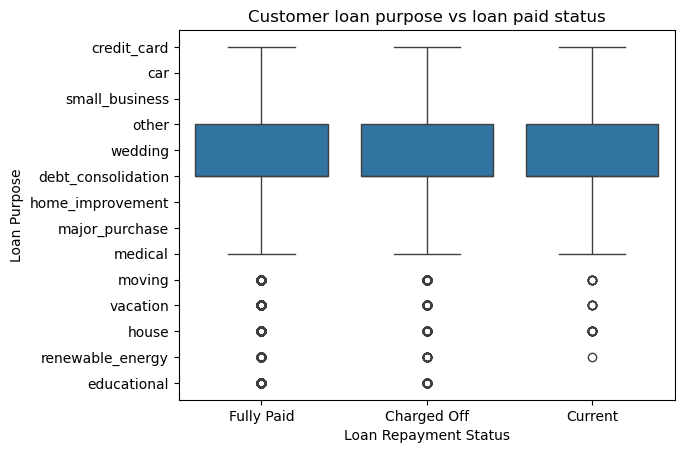

In [449]:
# customer loan purpose Vs Loan repayment status
# purpose: The purpose of the loan, which can show patterns of risky loan categories.
# From following we can conclude customer loan purpose not relevant to loan default

sns.boxplot(y='purpose', x='loan_status', data=loanDataFrame)
plt.title('Customer loan purpose vs loan paid status')
plt.ylabel('Loan Purpose')
plt.xlabel('Loan Repayment Status')
plt.show()

In [13]:
# different values of annual income. We can see there are outliers
loanDataFrame['annual_inc'].value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

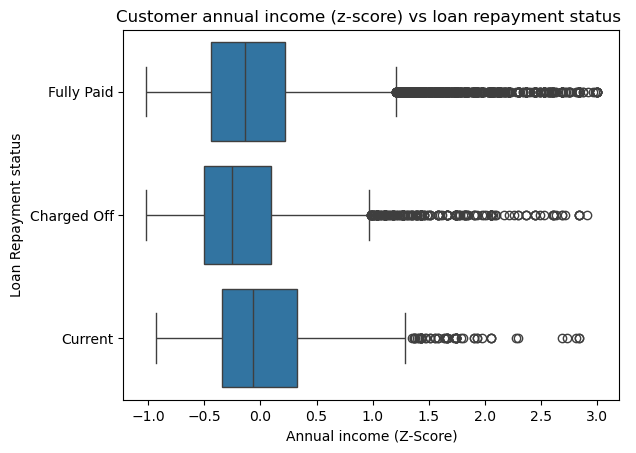

In [59]:
# Customer annual income (z-score) Vs Loan repayment status
# A borrower’s income is critical for repayment ability. Low income, relative to the loan amount, might indicate higher risk. 
#From following we can conclude customer annual income is not relevant to loan default

# Calculate Z-scores
loanDataFrame['Z-Score_annual_income'] = (loanDataFrame['annual_inc'] - loanDataFrame['annual_inc'].mean()) / loanDataFrame['annual_inc'].std()

# Filter out outliers based on Z-score
loanDataFrame_no_outliers = loanDataFrame[np.abs(loanDataFrame['Z-Score_annual_income']) < 3]

sns.boxplot(x='Z-Score_annual_income', y='loan_status', data=loanDataFrame_no_outliers)
plt.title('Customer annual income (z-score) vs loan repayment status ')
plt.xlabel('Annual income (Z-Score)')
plt.ylabel('Loan Repayment status')
plt.show()

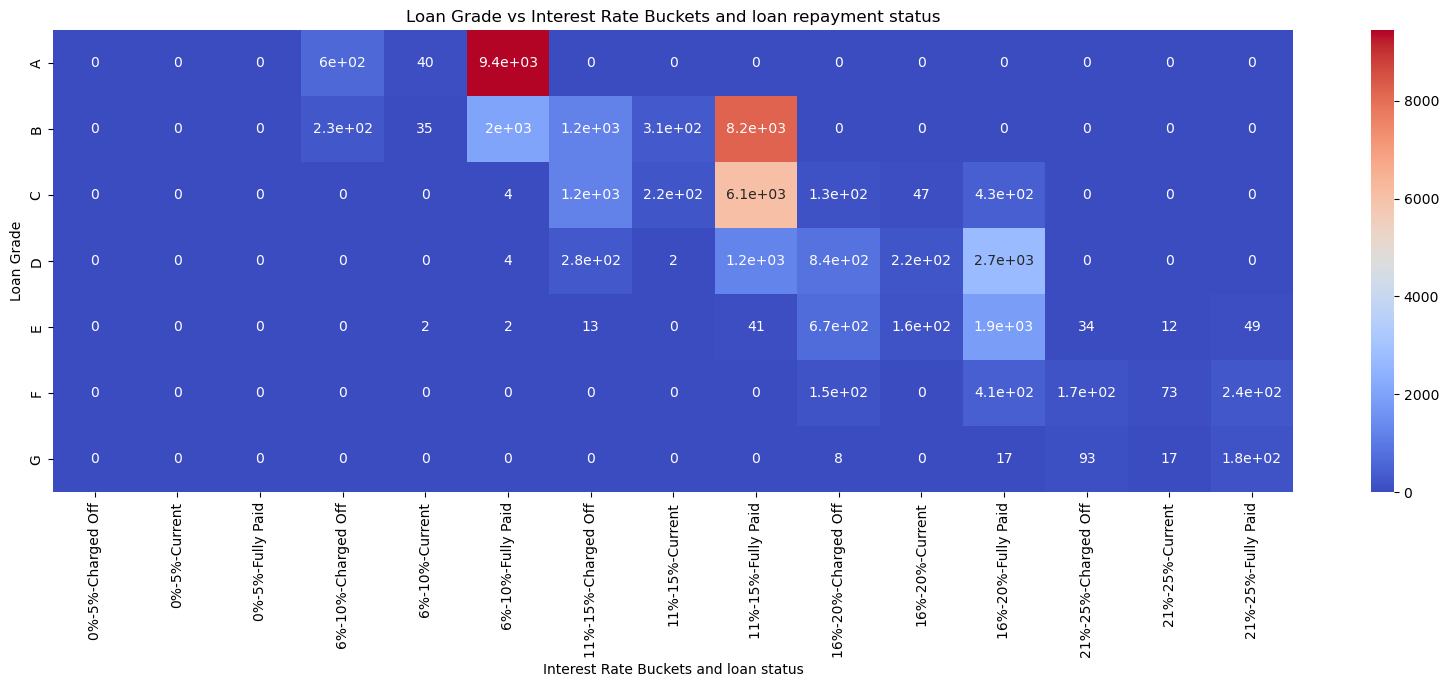

In [65]:
# Loan grade vs interest rate & loan repayment status
# Higher-grade borrowers are typically charged lower interest rates since they are considered safer investments. 
# On the other hand, borrowers with lower grades face higher interest rates to compensate for the increased risk of default.
# From following analysis we can conclude Higher interest rates and lower loan grades are not associated with a 
# higher likelihood of loan default.

loanDataFrame['intrest'] = loanDataFrame['int_rate'].str.replace('%', '').astype(float)

# Create interest rate buckets
bins = [0, 5, 10, 15,20,25]
labels = ['0%-5%', '6%-10%', '11%-15%', '16%-20%', '21%-25%']
loanDataFrame['interest_rate_bucket'] = pd.cut(loanDataFrame['intrest'], bins=bins, labels=labels)

# Create a pivot table
pivot = pd.pivot_table(loanDataFrame, values='intrest', index='grade', columns=['interest_rate_bucket','loan_status'], aggfunc='count', observed=False)

# Create heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Loan Grade vs Interest Rate Buckets and loan repayment status')
plt.xlabel('Interest Rate Buckets and loan status')
plt.ylabel('Loan Grade')
plt.show()

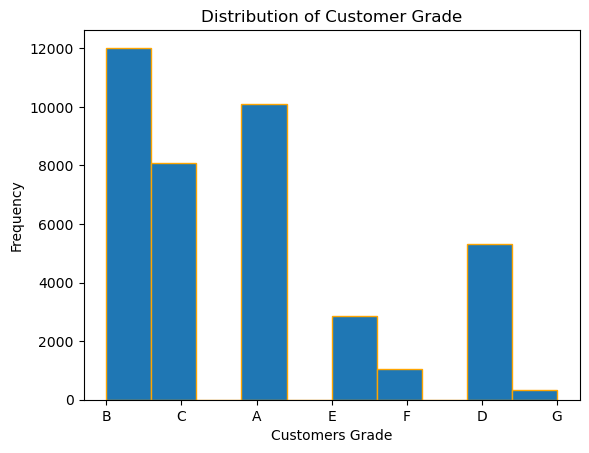

In [67]:
# Customer Grade distribution 
# From below we can conclude customer with grade A,B,C are higher in number compared to remaining grades

plt.hist(loanDataFrame['grade'], edgecolor='orange')
plt.title('Distribution of Customer Grade')
plt.xlabel('Customers Grade')
plt.ylabel('Frequency')
plt.show()

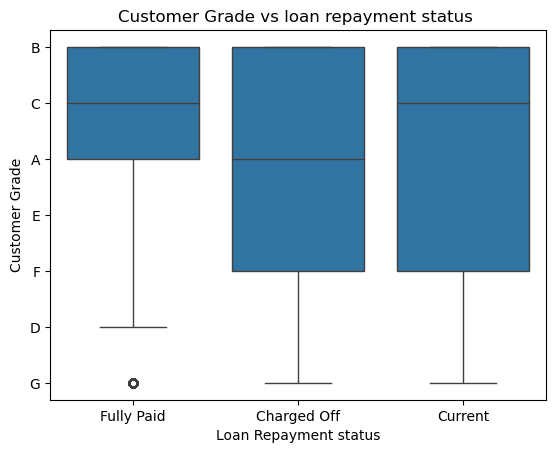

In [73]:
#Customer Grade vs Loan repayment status
#From following we can conclude customer grade is more relevant to loan default
sns.boxplot(y='grade', x='loan_status', data=loanDataFrame)
plt.title('Customer Grade vs loan repayment status ')
plt.ylabel('Customer Grade')
plt.xlabel('Loan Repayment status')
plt.show()

Recommendation: This is a derived column, indicates whether a loan should be approved or not, based on following several key columns that represent both the borrower's creditworthiness and potential risk.
Columns:
•	loan_status: This column contains the historical status of loans such as "Fully Paid," "Charged Off," and "Current.weou can use this as a guide for past behaviour. If a borrower has a pattern of defaults, you would lean toward rejecting the loan.
•	grade: The grade represents the risk profile of the borrower, with A being the safest and G the riskiest. You can set thresholds to make recommendations, such as:
o	Approve loans with grades A t
o	Risky approval with grades D to G. However, they repayed their loan fully in the past. This also need to be considered as these give more profits compared to others.o C.
o	Reject loans with grades D to G (or adjust based on company risk tolera
•	dti (Debt-to-Income Ratio): A higher DTI ratio indicates that the borrower is more financially burdened and therefore a higher risk. Loans could be rejected if the DTI exceeds a specific threshold, sa 40%. ymount.
•	emp_length: Employment length reflects job stability. Shorter employment histories may increase the risk of avoured.


In [41]:
# This method provides recommendation based on customer grading, DTI and loan status data
def EvaluateGradeRecommendation(row):
     if (row['grade'] in ['A', 'B', 'C'] and row['dti'] <= 40 and (row['loan_status'] in ['Fully Paid','Current'])):
            return 'Approve'
     elif (row['grade'] in ['D', 'E', 'F','G'] and row['dti'] <= 40 and (row['loan_status'] in ['Fully Paid'])):
            return 'Risky Approval'
     else:
            return 'Reject'

In [43]:
loanDataFrame['Recommendation'] = loanDataFrame.apply(lambda row: EvaluateGradeRecommendation(row), axis=1)

In [45]:
print(loanDataFrame.head())

   loan_amnt        term int_rate  installment grade emp_length  \
0       5000   36 months   10.65%       162.87     B  10+ years   
1       2500   60 months   15.27%        59.83     C   < 1 year   
2       2400   36 months   15.96%        84.33     C  10+ years   
3      10000   36 months   13.49%       339.31     C  10+ years   
4       3000   60 months   12.69%        67.79     B     1 year   

  home_ownership  annual_inc  loan_status         purpose addr_state    dti  \
0           RENT     24000.0   Fully Paid     credit_card         AZ  27.65   
1           RENT     30000.0  Charged Off             car         GA   1.00   
2           RENT     12252.0   Fully Paid  small_business         IL   8.72   
3           RENT     49200.0   Fully Paid           other         CA  20.00   
4           RENT     80000.0      Current           other         OR  17.94   

   acc_now_delinq  acc_open_past_24mths  Z-Score_annual_income  intrest  \
0               0                   NaN        

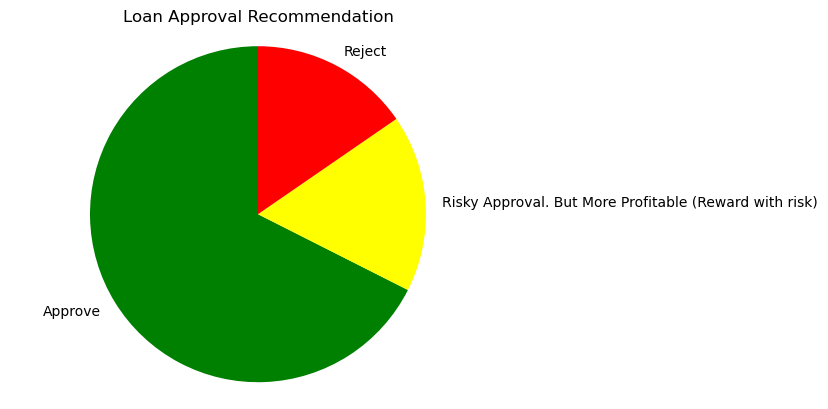

In [47]:
# Aggregate data based on 'Recommendation'
category_counts = loanDataFrame['Recommendation'].value_counts()
labels = ['Approve','Risky Approval. But More Profitable (Reward with risk)', 'Reject']
colors=['green','yellow','red']
plt.pie(category_counts, labels=labels, colors=colors, startangle=90)
plt.title('Loan Approval Recommendation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


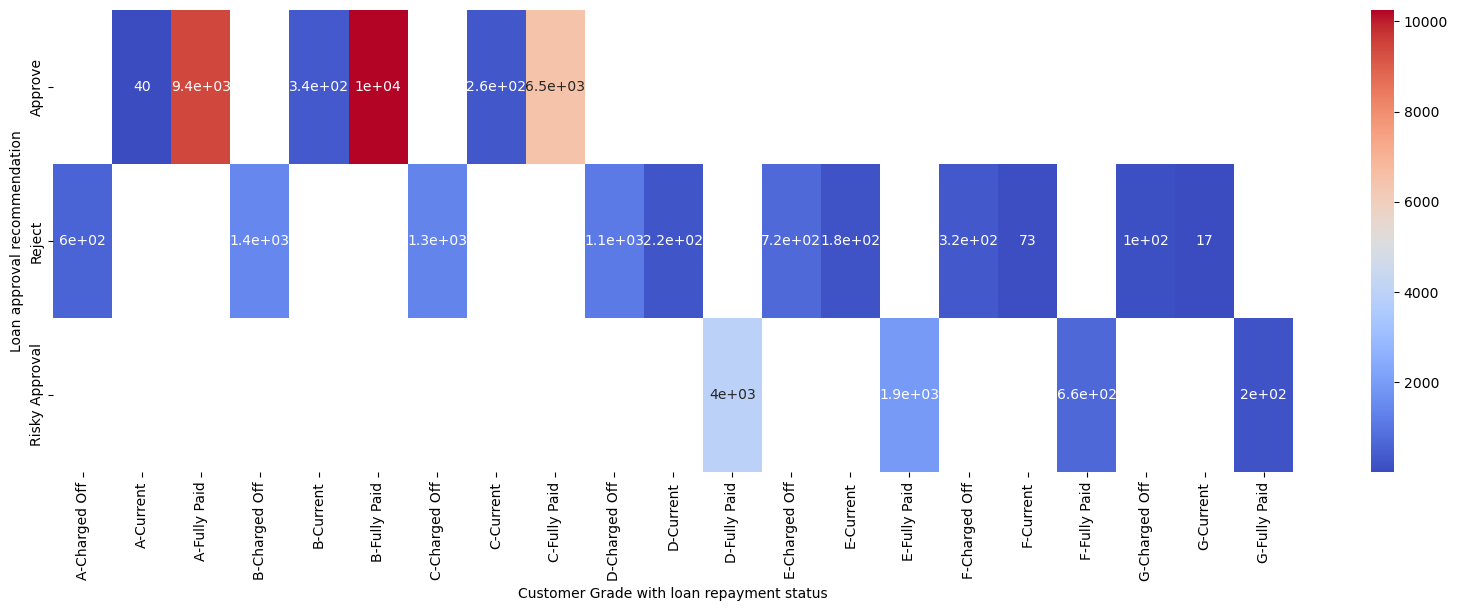

In [79]:
# Loan approval Recommendation vs (customer grade & loan status) relation
pivot_table = loanDataFrame.pivot_table(index='Recommendation', columns=['grade','loan_status'], aggfunc='size')

# Create custom colormap
colors = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(20, 6))
# heatmap
sns.heatmap(pivot_table,annot=True,  cmap=colors)
plt.xlabel('Customer Grade with loan repayment status')
plt.ylabel('Loan approval recommendation')
plt.show()